In [199]:
# For data visualization absed on the spotify most streamed songs 2023 dataset taken from kaggle

In [200]:
# Main Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# Import the dataset
lines = []
with open('spotify-2023.csv', 'r', encoding='utf-8', errors='ignore') as file:
    for f in file:
        lines.append(f.strip().split(','))
# Above method is used to handle utf-8 errors
dataset = pd.DataFrame(lines)


# print(dataset)


In [202]:
# Format dataset
dataset.columns = dataset.iloc[0]
dataset = dataset[1:]
dataset.reset_index(drop=True, inplace=True)
dataset1 = dataset

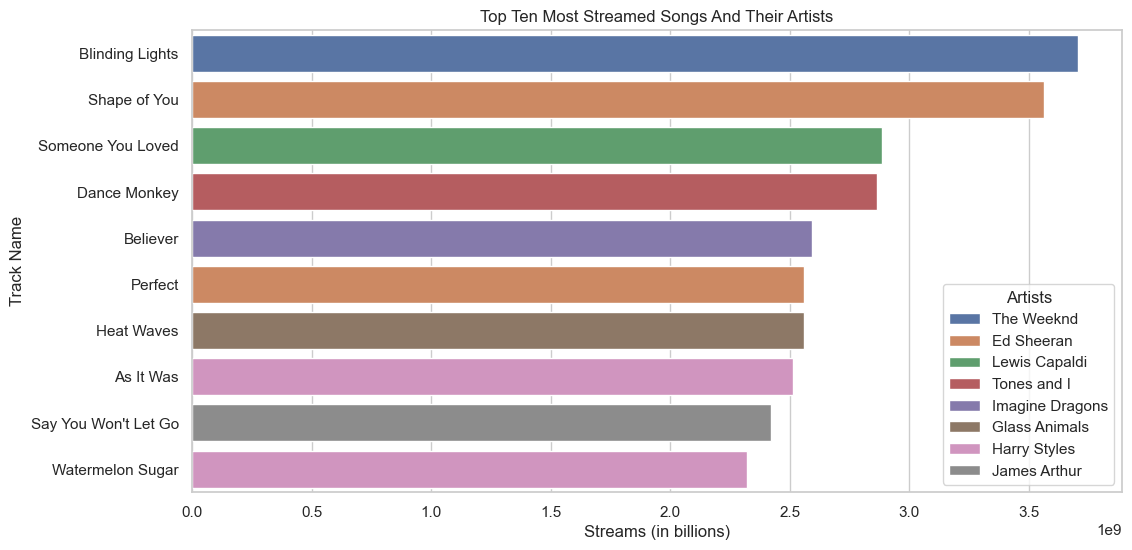

In [203]:
# Most stremed songs and thier artists
import matplotlib.ticker as ticker
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')
most_streamed = dataset.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='streams', y ='track_name', hue='artist(s)_name', data=most_streamed, dodge=False)
plt.title("Top Ten Most Streamed Songs And Their Artists")
plt.xlabel("Streams (in billions)")
plt.ylabel("Track Name")
plt.legend(title="Artists")
plt.savefig('Top Ten songs and artists.jpg')
plt.show()

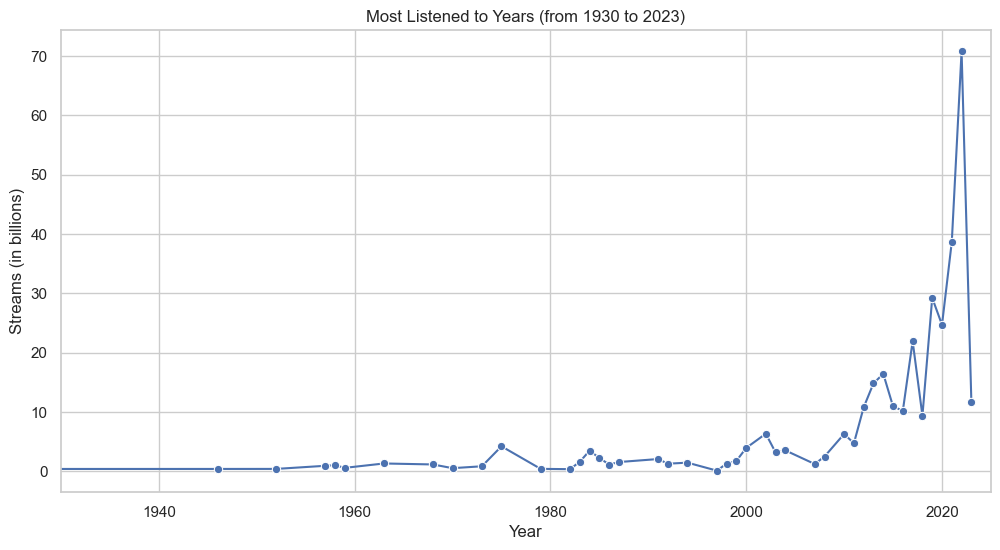

In [204]:
# Most Listened to Years from 1930 to 2023
dataset['released_year'] = pd.to_numeric(dataset['released_year'], errors='coerce')

yearly_streams = dataset.groupby('released_year')['streams'].sum().reset_index()
yearly_streams['streams'] = yearly_streams['streams'] / 1e9 

plt.figure(figsize=(12,6))
sns.lineplot(x='released_year', y='streams', data=yearly_streams, marker='o')
plt.title('Most Listened to Years (from 1930 to 2023)')
plt.xlabel('Year')
plt.xlim(1930,2025)
plt.ylabel("Streams (in billions)")
plt.savefig('Years Most Listened To.jpg')
plt.show()

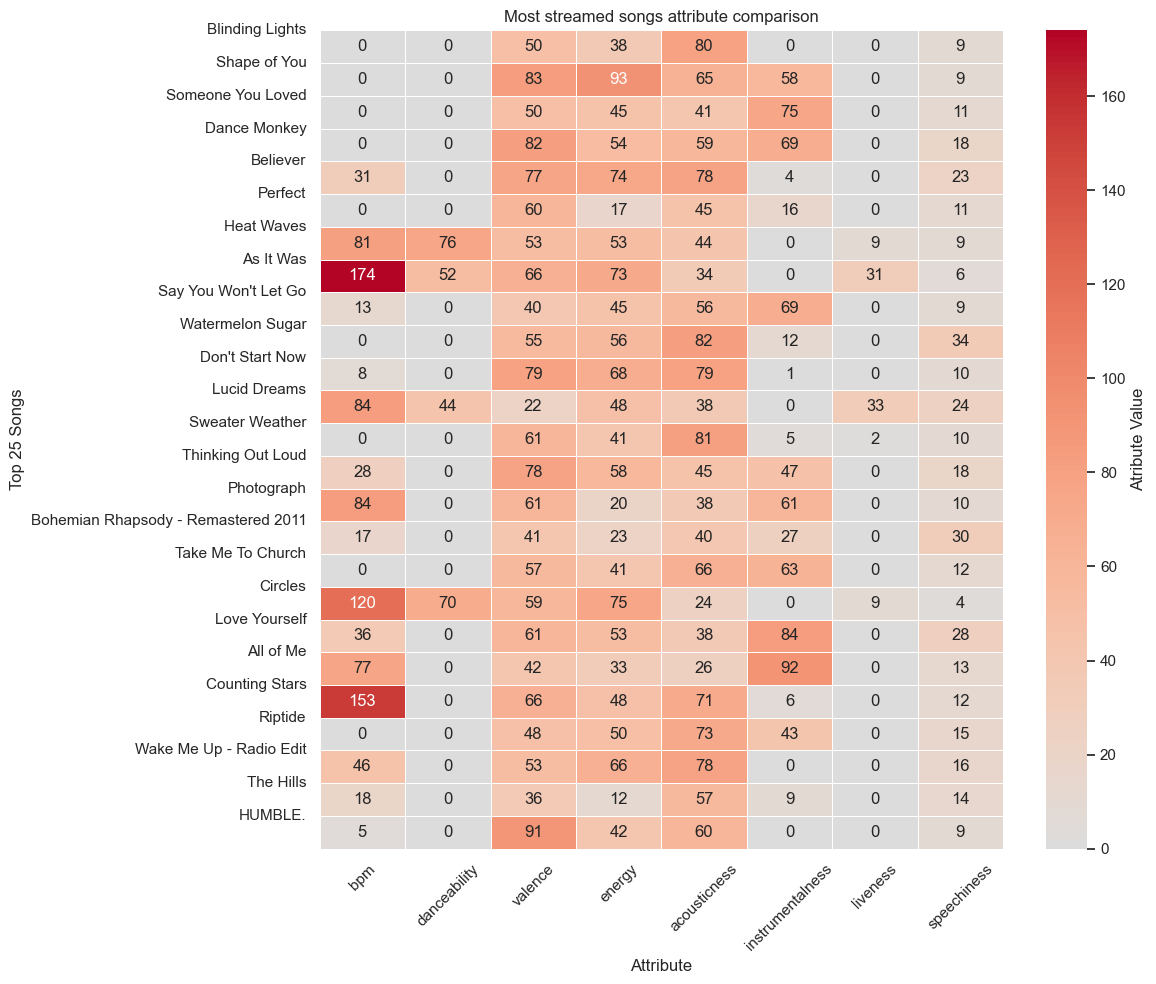

In [205]:
# A heat map of the top 25 songs based on the songs attributes
numeric_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')
dataset[numeric_columns] = dataset[numeric_columns].fillna(0)

top_25_streamed = dataset.sort_values(by='streams', ascending=False).head(25)
heatmap_data = top_25_streamed[numeric_columns]
heatmap_data.columns = [col.replace('_%', '') for col in heatmap_data.columns]
# print(top_25_streamed)

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, fmt='.0f', linewidth=.5, cbar_kws={'label': 'Atribute Value'})
plt.title("Most streamed songs attribute comparison")
plt.xlabel('Attribute')
plt.ylabel('Top 25 Songs')
plt.yticks(ticks=range(len(top_25_streamed)), labels=top_25_streamed['track_name'], rotation=0)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('heatmap of top25.jpg')
plt.show()

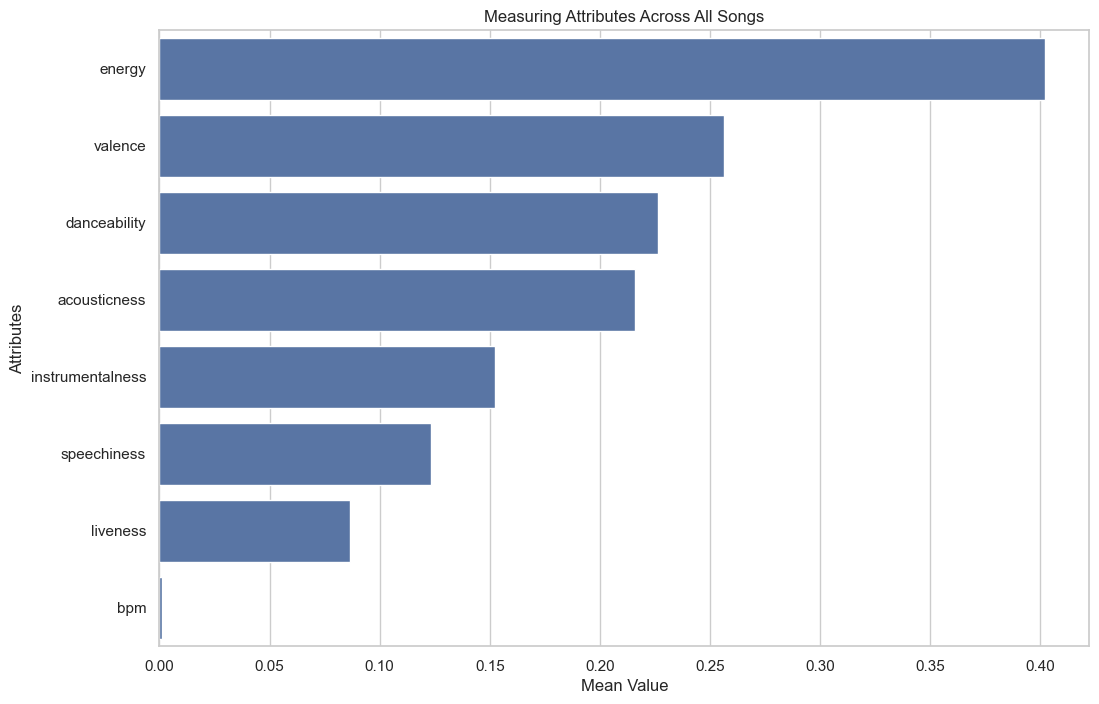

In [213]:
# Most Common Attributes across all the ~1000 songs
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(dataset[numeric_columns]), columns=numeric_columns)

numeric_columns_cleaned = [col.replace('_%', '') for col in numeric_columns]

attribute_means = dataset_normalized.mean()
attribute_means.index = numeric_columns_cleaned
attribute_means_sorted = attribute_means.sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=attribute_means_sorted.values, y=attribute_means_sorted.index)
plt.title("Measuring Attributes Across All Songs")
plt.xlabel('Mean Value')
plt.ylabel('Attributes')
plt.savefig('Measuring Attributes.jpg')

plt.show()

C:\Users\Huzaifa\AppData\Local\Temp\ipykernel_13168\343953249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['released_month'] = dataset1['released_month'].astype(int)
C:\Users\Huzaifa\AppData\Local\Temp\ipykernel_13168\343953249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['streams'] = dataset1['streams'].astype(int)
C:\Users\Huzaifa\AppData\Local\Temp\ipykernel_13168\343953249.py:38: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_

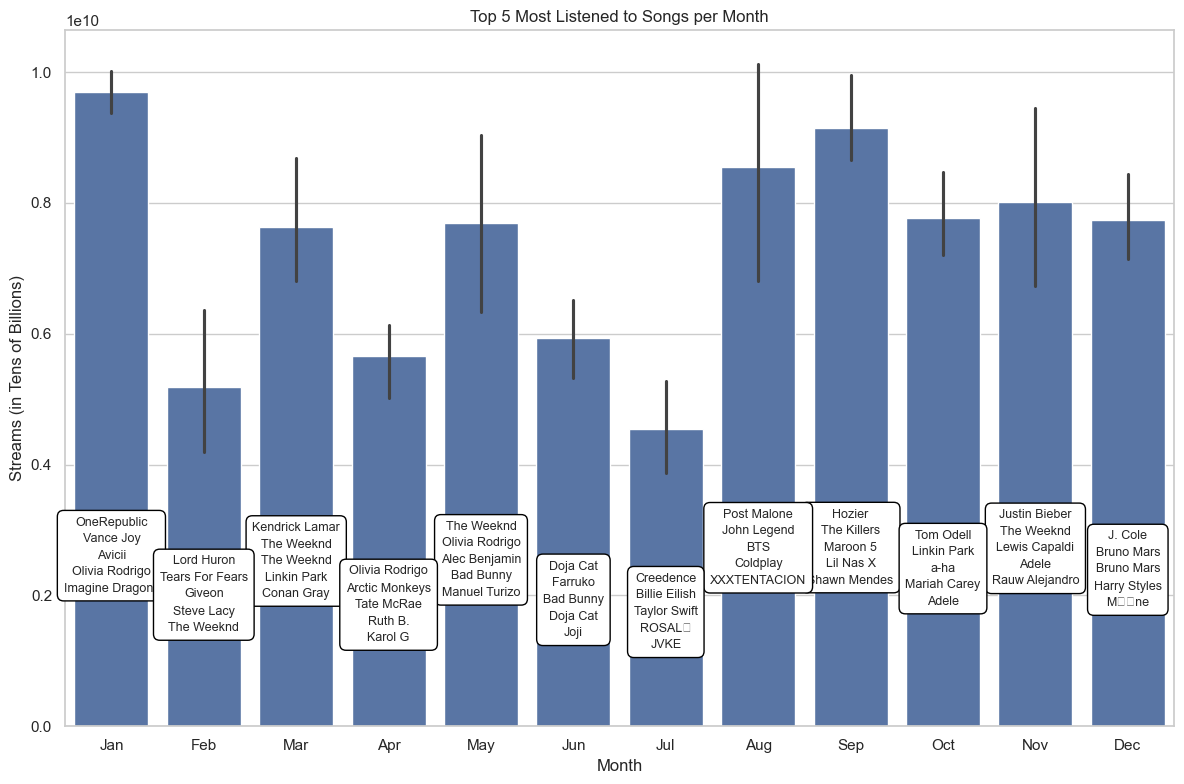

In [207]:
# Top artists for every month listened to in 2023 along with the number of cumulative streams

dataset1['released_month'] = pd.to_numeric(dataset1['released_month'], errors='coerce')
dataset1['streams'] = pd.to_numeric(dataset1['streams'], errors='coerce')

dataset1 = dataset1[(dataset1['released_month'].between(1, 12)) & (dataset1['streams'].notna())]
dataset1['released_month'] = dataset1['released_month'].astype(int)
dataset1['streams'] = dataset1['streams'].astype(int)

top_songs_pm = dataset1.sort_values(by='streams', ascending=False).groupby('released_month', as_index=False).head(5)
# print(top_songs_pm)
top_songs_pm['artist(s)_name'] = top_songs_pm['artist(s)_name'].apply(lambda x: x.split()[0] if len(x) > 20 else x)

# Convert month numbers to months
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = top_songs_pm['released_month'].map(month_names)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=months, y='streams', data=top_songs_pm, estimator=sum, order=month_order)

# handle the layout
for month in top_songs_pm['released_month'].unique():
    top_songs = top_songs_pm[top_songs_pm['released_month'] == month]['artist(s)_name']
    song_list = "\n".join(top_songs)
    y_max = top_songs_pm[top_songs_pm['released_month'] == month]['streams'].max()
    ax.text(month - 1, y_max + 100, song_list, ha='center', fontsize=9, va='bottom', linespacing=1.5, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Month')
plt.ylabel('Streams (in Tens of Billions)')
plt.xticks(rotation=0)
plt.title('Top 5 Most Listened to Songs per Month')
plt.tight_layout()
plt.savefig('top_songs_per_month.jpg')
plt.show()